In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_wine

In [6]:
X, y = load_wine(return_X_y = True, as_frame = True)
type(X)

pandas.core.frame.DataFrame

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
c1=RandomForestClassifier(n_estimators = 10, max_depth = 5)
c2=DecisionTreeClassifier(max_depth = 5)
c3=LogisticRegression(multi_class = "multinomial")

In [14]:
c1.fit(X_train,y_train)
c2.fit(X_train,y_train)
c3.fit(X_train,y_train)

G:\Anaconda3\envs\boston-housing\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [15]:
c1.score(X_train, y_train), c1.score(X_test, y_test)

(1.0, 0.9777777777777777)

In [16]:
c2.score(X_train, y_train), c2.score(X_test, y_test)

(1.0, 0.9333333333333333)

In [17]:
c3.score(X_train, y_train), c3.score(X_test, y_test)

(0.9699248120300752, 0.9555555555555556)

In [42]:
c1_w=c1.predict_proba(X_test)
c2_w=c2.predict_proba(X_test)
c3_w=c3.predict_proba(X_test)

In [67]:
avg=(c1_w+c2_w+c3_w)/3

In [69]:
avg.shape

(45, 3)

In [43]:
import matplotlib.pyplot as plt

In [70]:
probas_test=[c1_w,c2_w,c3_w,avg]

In [130]:
probas_test[0].shape

(45, 3)

In [58]:
idx=np.random.randint(0, len(y_test), 3)

In [59]:
idx

array([19, 21, 37])

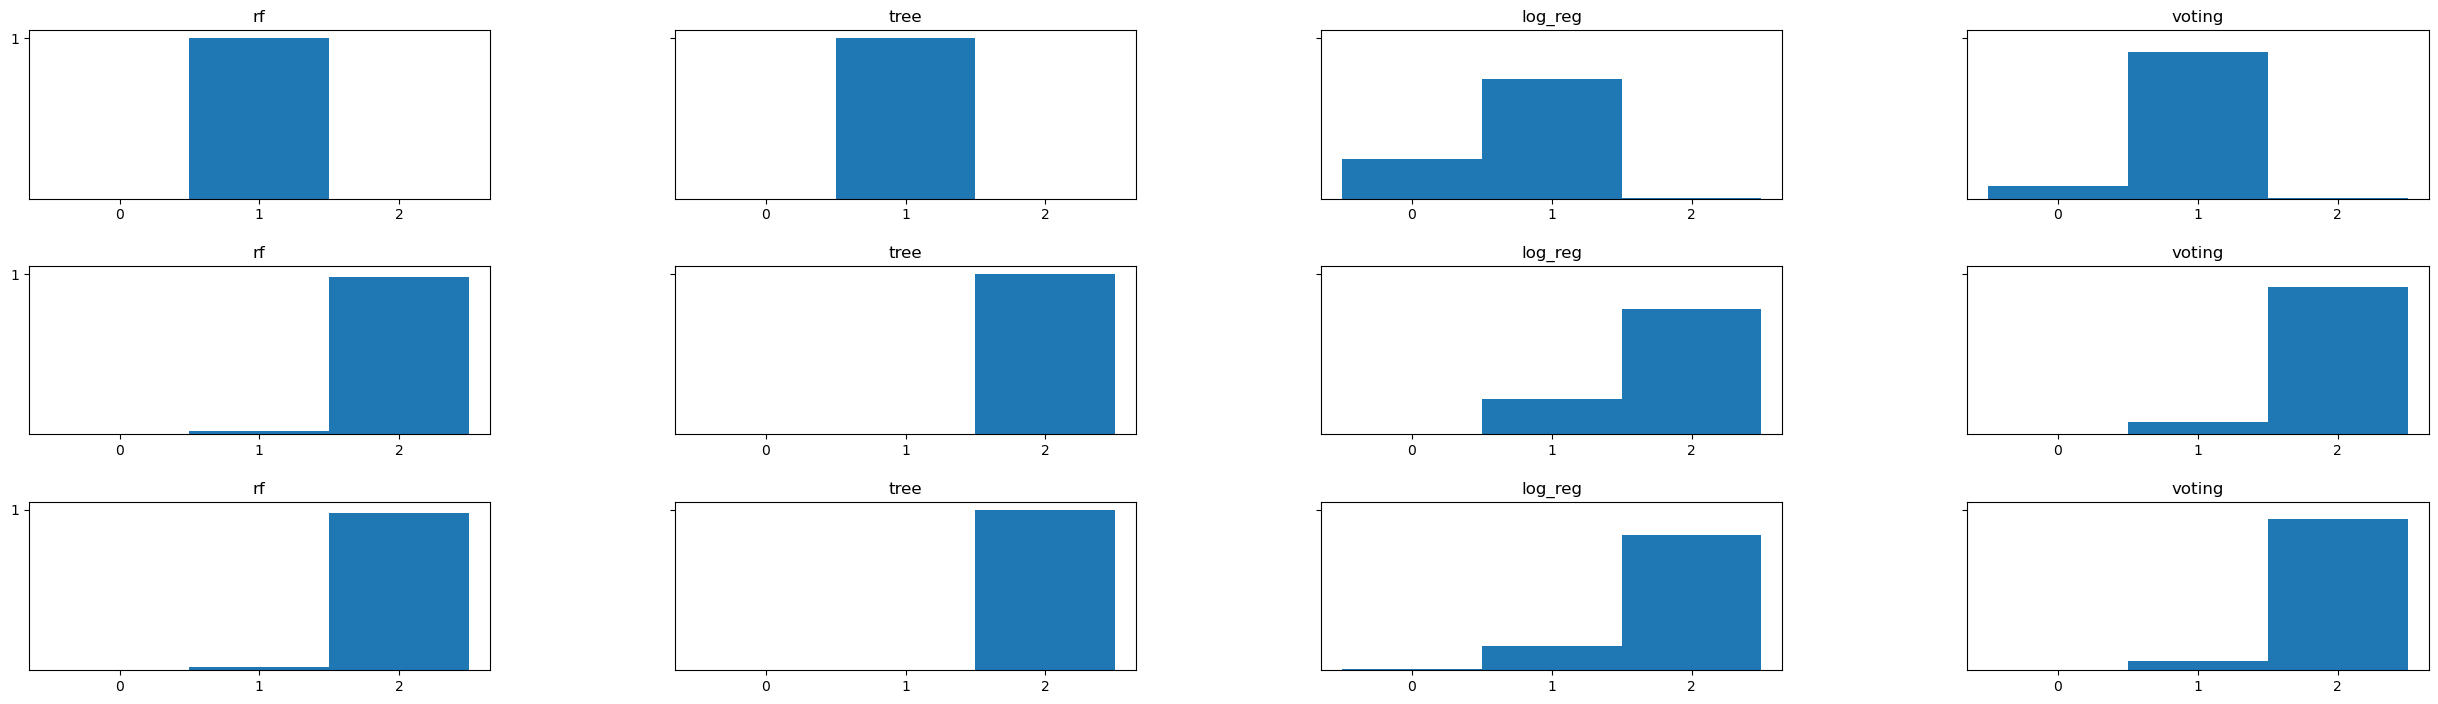

In [71]:
probas = np.array([np.take(clf_proba, idx, axis = 0) for clf_proba in probas_test])

probas_t = [probas[:, i, :] for i in range(3)]

fig, ax = plt.subplots(3, 4, figsize=(30, 8), sharey='row')
plt.setp(ax, xticks = list(range(10)), xticklabels = list(range(10)), yticks=[1, 2, 3])

j = 0

for est_proba in probas_t:
    i = 0
    for proba, name in zip(est_proba, ['rf', 'tree', 'log_reg', 'voting']):
        ax[j, i].bar(range(3), proba, width = 1)
        ax[j, i].set_title(name)
        i += 1
    j += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Bagging

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [88]:
y_train[73]

1

In [105]:
n=5
bagg_X=[]
temp_X=pd.concat([X_train],ignore_index=True)
for j in range(n):
    bagg_t=pd.DataFrame(columns=X_train.columns)
    for i in range (0,int(len(X_train))):
        rand=np.random.randint(0,int(len(X_train)))
        bagg_t=bagg_t.append(temp_X.loc[rand])
    bagg_X.insert(j,bagg_t)

C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanisl

C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanislaus\AppData\Local\Temp\ipykernel_25760\2040200593.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bagg_t=bagg_t.append(temp_X.loc[rand])
C:\Users\Stanisl

In [91]:
bagg_X[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 95 to 74
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: fl

In [106]:
bagg_X[0].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
51,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
44,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0
24,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
87,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
64,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0


In [107]:
bagg_X[1].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
18,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
50,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0
55,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
105,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
36,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0


In [108]:
bagg_X[2].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
95,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
99,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0
87,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
14,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
112,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0


In [109]:
bagg_X[3].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
121,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
104,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
108,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0
103,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
128,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0


In [110]:
bagg_X[4].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
68,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
25,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
116,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0
97,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0
105,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


In [111]:
vcb=[RandomForestClassifier(n_estimators = 10, max_depth = 5)]*5
res=[]

In [114]:
for i in range(5):
    vcb[i].fit(bagg_X[i],y_train)
    res.insert(i,vcb[i].predict_proba(bagg_X[i]))

In [124]:
res[0].shape

(133, 3)

In [127]:
avgb=sum(res)/5

In [151]:
avgb.shape

(133, 3)

In [138]:
probas_testb=[]
for i in range(5):
    probas_testb.insert(i,res[i])
probas_testb.append(avgb)
probas_testb[5].shape

(133, 3)

In [148]:
idx=np.random.randint(0, len(y_test), 5)
idx

array([31, 31, 13, 40, 27])

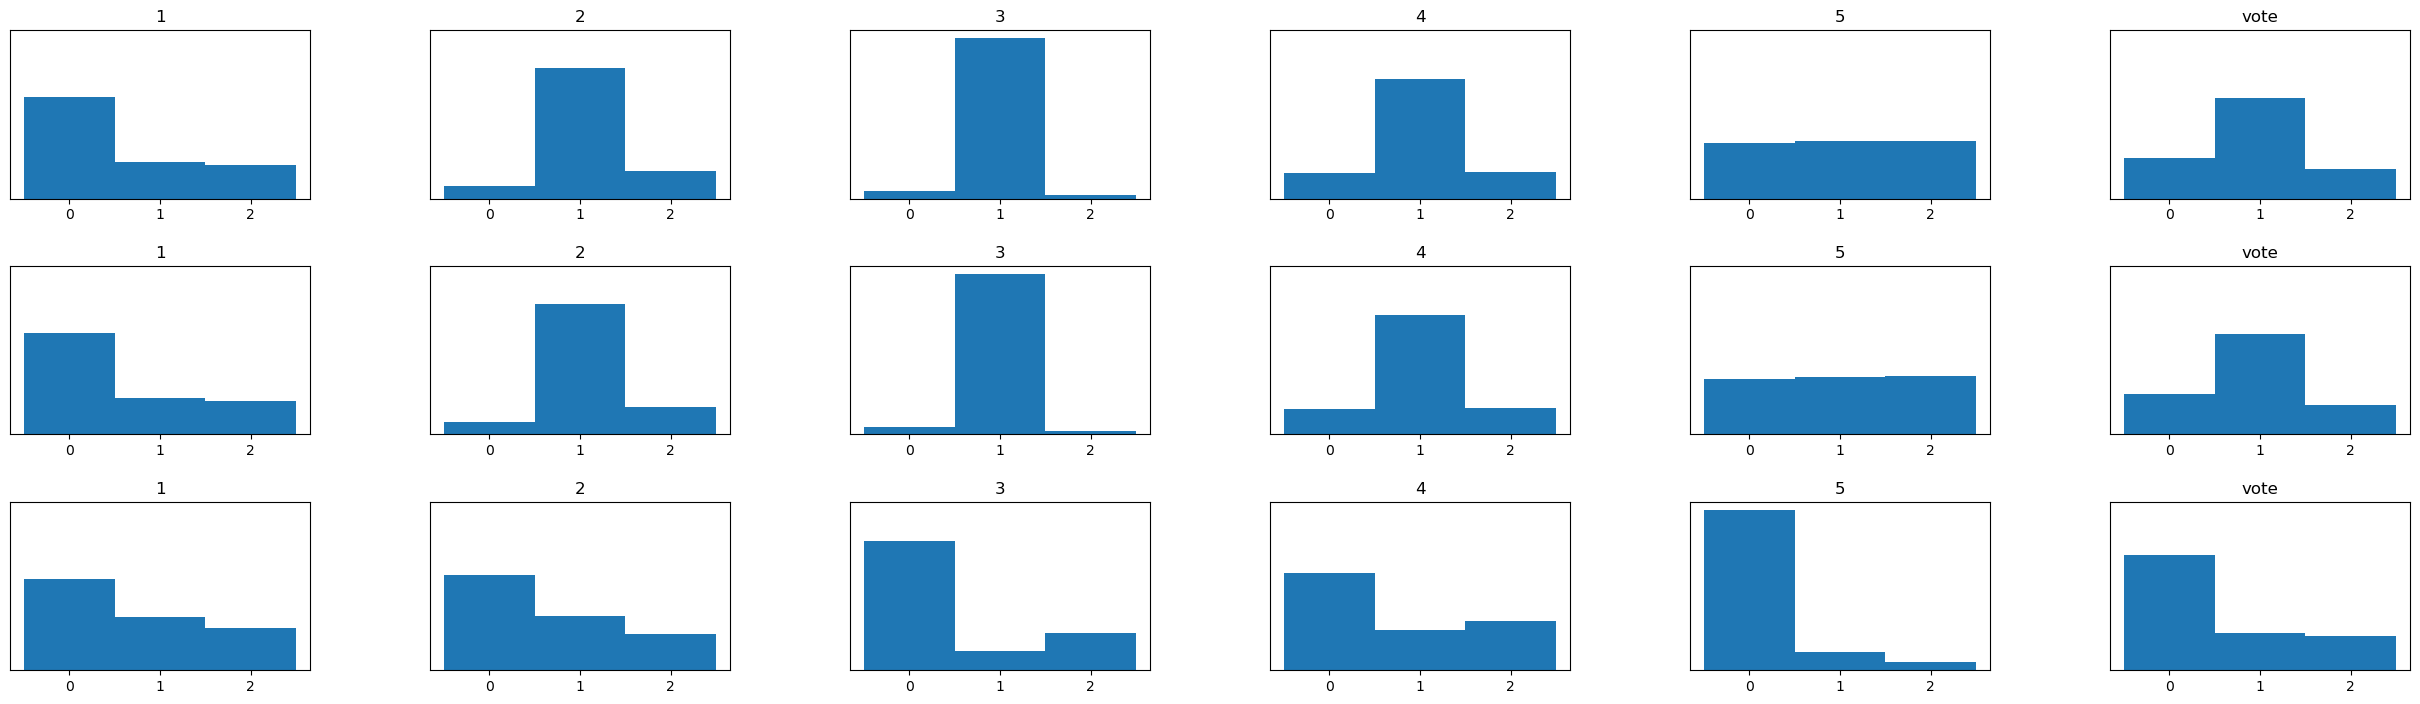

In [150]:
probas = np.array([np.take(clf_proba, idx, axis = 0) for clf_proba in probas_testb])

probas_t = [probas[:, i, :] for i in range(3)]

fig, ax = plt.subplots(3, 6, figsize=(30, 8), sharey='row')
plt.setp(ax, xticks = list(range(10)), xticklabels = list(range(10)), yticks=[1, 2, 3])

j = 0

for est_proba in probas_t:
    i = 0
    for proba, name in zip(est_proba, ['1', '2', '3', '4','5','vote']):
        ax[j, i].bar(range(3), proba, width = 1)
        ax[j, i].set_title(name)
        i += 1
    j += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)